In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


# change settings for plots
plt.style.use('fivethirtyeight')

In [4]:
# write plotting functions to be used later



# 1) Load and Clean Data

In [5]:
data = pd.read_csv('/Users/alitaimurshabbir/Desktop/cfpb-consumer-complaints/data/complaint_data.csv')

## Find and deal with missing data

In [30]:
# number of cells missing as percentage of total cells

missing_percent = round((data.isnull().sum().sum()/np.product(data.shape))*100)
print('The proportion of missing data on a cell-by-cell basis is {}%'.format(missing_percent))

The proportion of missing data on a cell-by-cell basis is 21%


(0.0, 1300000.0)

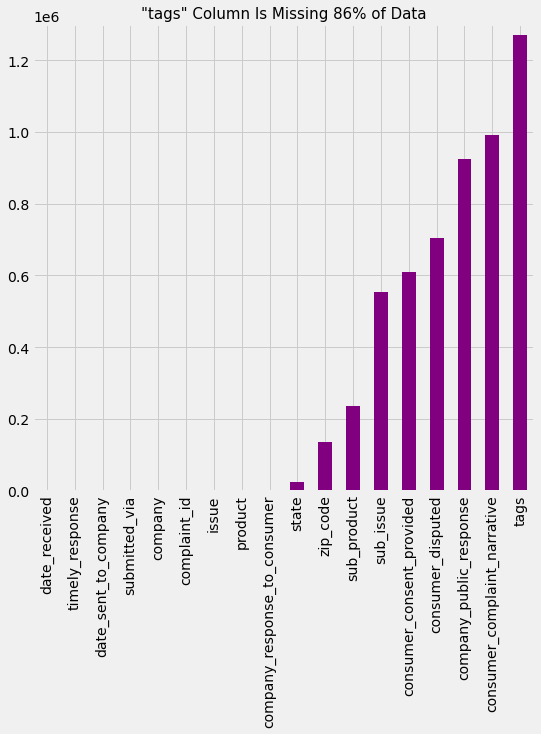

In [43]:
# absolute number of cells missing from data per column

plt.figure(figsize = (8, 8))
data.isnull().sum().sort_values().plot(kind = 'bar', color = 'purple')
plt.title('"tags" Column Is Missing 86% of Data', size = 15)
plt.ylim([0, 1300000])

"tags" has the greatest number of cells missing (1,271,201 cells) followed by "consumer_complaint_narrative" (990,679 cells) and "company_public_response" (923,665 cells)

If we take a look at the values of "tags", we see that it relates to the demographic and military background of a customer (see below). We'll keep this data for now to understand more about our customers at a later stage.

More broadly, I am going to follow this approach for the whole dataset. In my judgement it doesn't make sense to drop any missing values d

In [35]:
data.tags.value_counts()

Servicemember                    99855
Older American                   84371
Older American, Servicemember    16339
Name: tags, dtype: int64

Next, looking at "company_public_response" shows us some standard responses by the Company in each case of customer complaints. We'll keep these records for the same purpose as above

In [45]:
data.company_public_response.value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            399111
Company believes it acted appropriately as authorized by contract or law                                                    70164
Company chooses not to provide a public response                                                                            52473
Company believes the complaint is the result of a misunderstanding                                                           6425
Company disputes the facts presented in the complaint                                                                        5793
Company believes complaint caused principally by actions of third party outside the control or direction of the company      4343
Company believes complaint is the result of an isolated error                                                                4232
Company believes complaint represents an opportunity for improvement to better serve consu

Text(0, 0.5, 'Did the Customer Dispute?')

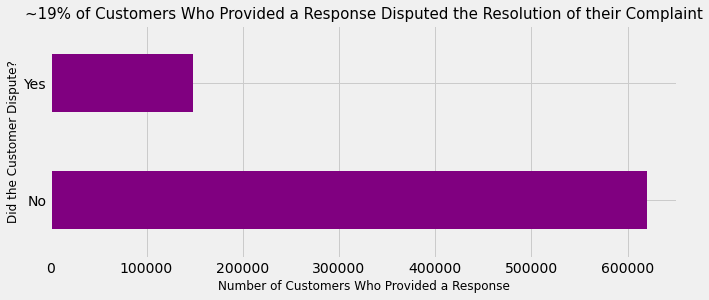

In [64]:
# "consumer_disputed" column and values

plt.figure(figsize = (10, 4))
data.consumer_disputed.value_counts().plot(kind = 'barh', color = 'purple')
plt.title('~19% of Customers Who Provided a Response Disputed the Resolution of their Complaint', size = 15)
plt.xlabel('Number of Customers Who Provided a Response', size = 12)
plt.ylabel('Did the Customer Dispute?', size = 12)

# 1) Load and Clean Data

In [66]:
data = pd.read_csv('/Users/alitaimurshabbir/Desktop/CRM Analytics Datasets/marketing_campaign.csv', sep = ';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 1.1) Description of Columns

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

- Complain - 1 if customer complained in the last 2 years

- DtCustomer - date of customer’s enrolment with the company

- Education - customer’s level of education

- Marital - customer’s marital status

- Kidhome - number of small children in customer’s household

- Teenhome - number of teenagers in customer’s household

- Income - customer’s yearly household income

- MntFishProducts - amount spent on fish products in the last 2 years

- MntMeatProducts - amount spent on meat products in the last 2 years

- MntFruits - amount spent on fruits products in the last 2 years

- MntSweetProducts - amount spent on sweet products in the last 2 years

- MntWines - amount spent on wine products in the last 2 years

- MntGoldProds - amount spent on gold products in the last 2 years

- NumDealsPurchases - number of purchases made with discount

- NumCatalogPurchases - number of purchases made using catalogue

- NumStorePurchases - number of purchases made directly in stores

- NumWebPurchases - number of purchases made through company’s web site

- NumWebVisitsMonth - number of visits to company’s web site in the last month

- Recency - number of days since the last purchase

## 1.2) Check for Duplicates

In [70]:
sum(data['ID'].duplicated())

0

Using the unique identifier "ID", we find no duplicates

## 1.3) Find and deal with missing data

In [73]:
missing_percent = (data.isnull().sum().sum()/np.product(data.shape))*100
print('The proportion of missing data on a cell-by-cell basis is {}%'.format(missing_percent))

The proportion of missing data on a cell-by-cell basis is 0.03694581280788178%


The amount of data missing is miniscule. We can isolate which column has this missing data then drop those rows. This will not impact the quality of the dataset since, as stated, there's very few rows that are empty

In [72]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [75]:
# drop rows where "Income" is missing data

data = data[data['Income'].notna()]

## 1.4) Check for extreme values that could be erroneous

In [79]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


There do not seem to be any obviously erroneous values. However, we see that the earliest year of birth in the data is 1893. This dataset is from 2020, making this particular customer 127 years old at the time of collection. Is this a valid record? It's possible but highly unlikely.

I will keep this record for now and, just for curiosity's sake, check how many customers are older than 90 years of age

In [84]:
# to be 90 years of age or more, a customer needs to be born in or before 1932 (2020-1930 = 90)

data[data['Year_Birth'] <= 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


# 2) Exploratory Data Analysis

## 2.1) Income

First I want to find out how the income of customer varies with acceptances of offers across the 5 different campaigns listed.

To be able to do this, I will examine the distribution of the Income variable and create appropriate bins, then plot these against the campaign responses

Text(0, 0.5, 'Frequency')

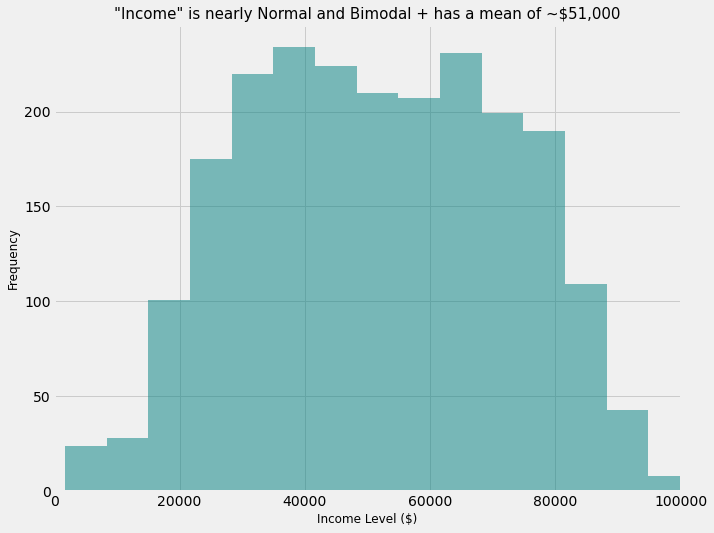

In [120]:
# create histogram of "Income"
# Restrict upper limit of "Income" to exclude entries above 100,000 for better
# visualisation. There are 13 such cases

plt.figure(figsize = (10, 8))
data['Income'].hist(bins = 100, color = 'teal', grid = True, alpha = 0.5)
plt.xlim([0, 100000])
plt.title('"Income" is nearly Normal and Bimodal + has a mean of ~$51,000', size = 15)
plt.xlabel('Income Level ($)', size = 12)
plt.ylabel('Frequency', size = 12)

Text(0, 0.5, 'Density')

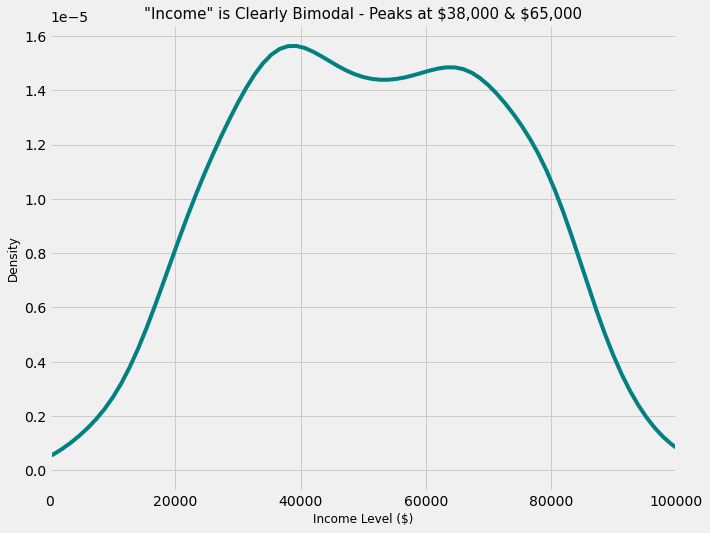

In [130]:
# Let's create a density plot for a smoother graph

plt.figure(figsize = (10, 8))
data['Income'].plot(kind = 'kde', color = 'teal')
plt.xlim([0, 100000])
plt.title('"Income" is Clearly Bimodal - Peaks at \$38,000 & \$65,000', size = 15)
plt.xlabel('Income Level ($)', size = 12)
plt.ylabel('Density', size = 12)

This confirms that the Income variable is Bimodal

### 2.11) Number of Customer Conversions by Marketing Campaign

In [142]:
# Create deciles - 10 bins with "Income" variable equally divided

data['Income Deciles'] = pd.qcut(data.Income, q = 10, precision = 0)

In [264]:
# write function to plot Income Deciles against Ad Campaign Purchase Rates for Each Campaign

def income_vs_purchase(ad_campaign_number, plot_title):
    plt.figure(figsize = (12, 10))
    pd.crosstab(data['Income Deciles'], data[ad_campaign_number]).plot(kind = 'barh', color = ['red', 'teal'])
    plt.suptitle(plot_title, size = 14)
    plt.title('Raw Number of Customer Conversions per Income Decile ($)', size = 11)
    plt.legend(loc = 'lower right')
    plt.xlabel('Number of Customers', size = 10)
    plt.ylabel('Income Deciles ($)', size = 10)
    plt.show()

<Figure size 864x720 with 0 Axes>

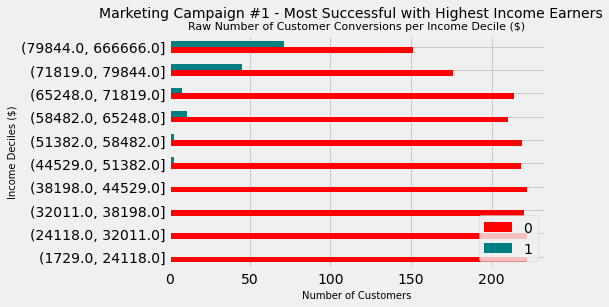

In [265]:
income_vs_purchase('AcceptedCmp1','Marketing Campaign #1 - Most Successful with Highest Income Earners')

<Figure size 864x720 with 0 Axes>

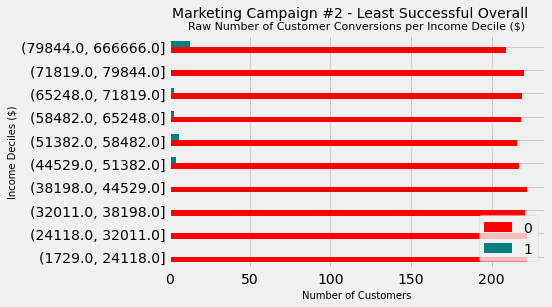

In [266]:
income_vs_purchase('AcceptedCmp2','Marketing Campaign #2 - Least Successful Overall')

<Figure size 864x720 with 0 Axes>

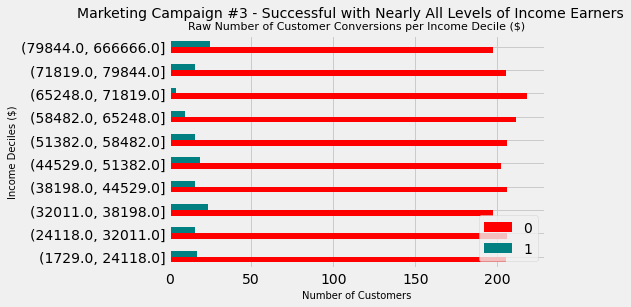

In [267]:
income_vs_purchase('AcceptedCmp3','Marketing Campaign #3 - Successful with Nearly All Levels of Income Earners')

<Figure size 864x720 with 0 Axes>

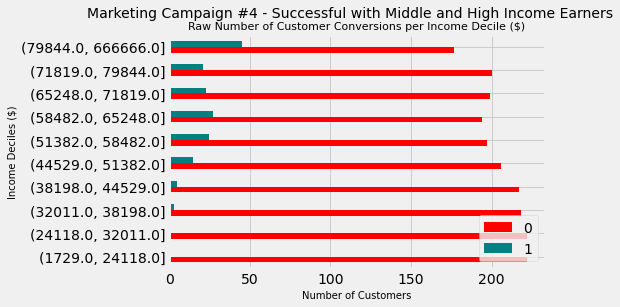

In [268]:
income_vs_purchase('AcceptedCmp4','Marketing Campaign #4 - Successful with Middle and High Income Earners')

<Figure size 864x720 with 0 Axes>

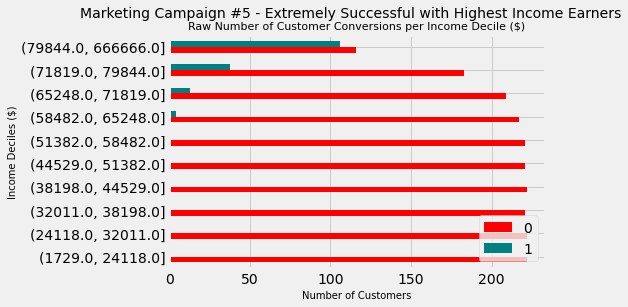

In [269]:
income_vs_purchase('AcceptedCmp5','Marketing Campaign #5 - Extremely Successful with Highest Income Earners')

### 2.12) Conversion Rates (%) by Marketing Campaign

Text(0, 0.5, 'Conversion Rate (%)')

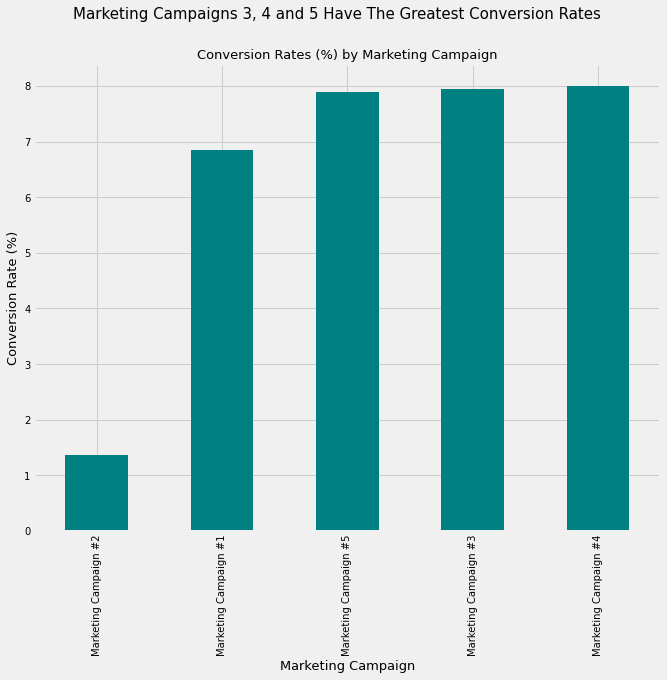

In [270]:
# Percentage of Conversions by Marketing Campaign

conv_1 = round((data.AcceptedCmp1.value_counts()[1]/data.AcceptedCmp1.value_counts()[0])*100, 2)
conv_2 = round((data.AcceptedCmp2.value_counts()[1]/data.AcceptedCmp2.value_counts()[0])*100, 2)
conv_3 = round((data.AcceptedCmp3.value_counts()[1]/data.AcceptedCmp3.value_counts()[0])*100, 2)
conv_4 = round((data.AcceptedCmp4.value_counts()[1]/data.AcceptedCmp4.value_counts()[0])*100, 2)
conv_5 = round((data.AcceptedCmp5.value_counts()[1]/data.AcceptedCmp5.value_counts()[0])*100, 2)

conv_rates = pd.Series([conv_1, conv_2, conv_3, conv_4, conv_5],
                       index = ['Marketing Campaign #1',
                                'Marketing Campaign #2',
                                'Marketing Campaign #3',
                                'Marketing Campaign #4',
                                'Marketing Campaign #5'])

plt.figure(figsize = (10, 8))
conv_rates.sort_values().plot(kind = 'bar', color = 'teal')
plt.suptitle('Marketing Campaigns 3, 4 and 5 Have The Greatest Conversion Rates', size = 15)
plt.title('Conversion Rates (%) by Marketing Campaign', size = 13)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Marketing Campaign', size = 13)
plt.ylabel('Conversion Rate (%)', size = 13)

### 2.13) Number of Total Conversions by Income Decile

Text(0.5, 1.0, 'Raw Number of Customer Conversions Across All Marketing Campaings')

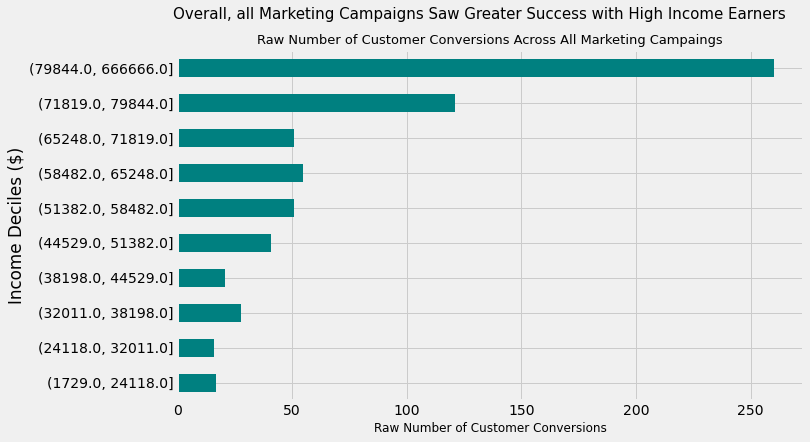

In [253]:
plt.figure(figsize = (10, 6))

data.groupby('Income Deciles')[['AcceptedCmp1',
                                'AcceptedCmp2',
                                'AcceptedCmp3',
                                'AcceptedCmp4',
                                'AcceptedCmp5']].sum().sum(axis = 1).plot(kind = 'barh',
                                                                          color = 'teal')

plt.xlabel('Raw Number of Customer Conversions', size = 12)
plt.ylabel('Income Deciles ($)')
plt.suptitle('Overall, all Marketing Campaigns Saw Greater Success with High Income Earners', size = 15)
plt.title('Raw Number of Customer Conversions Across All Marketing Campaings', size = 13)

**Summary:**

- In descending order, Marketing Campaigns 5, 1 and 4 were the most successful with the highest bands of income earners


- In descending order, Marketing Campaigns 5, 4 and 3 were the most successful overall - they had the greatest conversion rates


- In Marketing Campaigns 5, 1 and 3, there were little to no purchases from lower income earners, suggesting that these were explicitly targeted at high income earners


- The success of Marketing Campaign 3 seems to be related the least to Income out of all Marketing Campaigns, as there was a moderate response from all bands of income earners

## 2.2) Age and Education

(20.0, 80.0)

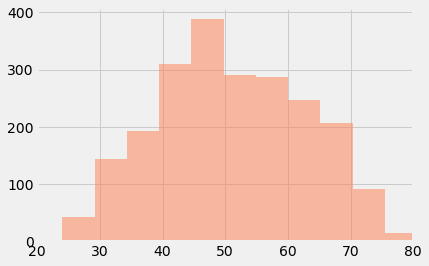

In [288]:
# Create "Age" variable

data['Age'] = 2020 - data['Year_Birth']
data['Age'].hist(bins = 20, color = 'coral', alpha = 0.5)
plt.xlim([20, 80])